In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose

from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath, plot_conductivity_fft
from src.load_data import load_sheet, clean_sheet_with_label

%load_ext autoreload
%matplotlib
%autoreload 2

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
import os

print(os.getcwd())

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics


In [3]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet_with_label(internal_df)
# two_side_plate, sheet2 = load_sheet("Electroplate Experiments Data JUN_JUL", "2 side Experimental Result")
# two_side_plate = clean_sheet_with_label(two_side_plate)
august_df, sheet3 = load_sheet("Electroplating Experiments Data August", "Sheet1")
august_df = clean_sheet_with_label(august_df)
september_df, sheet4 = load_sheet("Electroplating Experiments Data September", "Sheet1")
september_df =clean_sheet_with_label(september_df)

internal_df[internal_df['bath_id']=='Bath_3']
combined_df = pd.concat([internal_df, august_df, september_df])
combined_df['run_id'].unique()

array(['JUL_3_1', 'JUL_3_2', 'JUL_3_3', 'JUL_3_4', 'JUL_7_1', 'JUL_7_2',
       'JUL_7_3', 'JUL_7_4', 'JUL_8_1', 'JUL_8_2', 'JUL_8_3', 'JUL_8_4',
       'JUL_9_1', 'JUL_9_2', 'JUL_16_1', 'JUL_16_2', 'JUL_16_3',
       'JUL_16_4', 'JUL_16_5', 'JUL_16_6', 'JUL_17_1', 'JUL_17_2',
       'JUL_17_3', 'JUL_17_4', 'JUL_17_5', 'JUL_17_6', 'JUL_17_7',
       'JUL_21_1', 'JUL_21_2', 'JUL_21_3', 'JUL_21_4', 'JUL_22_1',
       'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6',
       'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2',
       'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_1', 'JUL_24_2',
       'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7',
       'JUL_24_8', 'JUL_24_9', 'JUL_24_10', 'JUL_31_1', 'JUL_31_2',
       'JUL_31_3', 'JUL_31_4', 'JUL_31_5', 'JUL_31_6', 'AUG_6_1',
       'AUG_6_2', 'AUG_7_1', 'AUG_7_2', 'AUG_7_3', 'AUG_7_4', 'AUG_7_5',
       'AUG_7_6', 'SEPT_24_1', 'SEPT_24_2', 'SEPT_25_1', 'SEPT_25_2',
       'SEPT_25_3', 'SEPT_25_4', 'SEPT_25_5

In [4]:
jul_22_3 = combined_df[combined_df['run_id']=='JUL_22_3'].copy()
print(f'Anomaly C type: {jul_22_3['Anomaly C'].unique()}')
print(f'Anomaly P type: {jul_22_3['Anomaly P'].unique()}')
print(f'Anomaly T type: {jul_22_3['Anomaly T'].unique()}')
print(f'Anomaly V type: {jul_22_3['Anomaly V'].unique()}')

Anomaly C type: ['C3']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N']


In [5]:
SENSOR_FEATURES = ["conductivity", "temperature", "pH",	"voltage"]
TRAIN_RUNS = ['JUL_22_1','JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6','JUL_22_7', 'JUL_22_8', 'JUL_22_9', 
			  'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5']
TEST_RUNS = ['JUL_24_1', 'JUL_24_2',
       'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7',
       'JUL_24_8', 'JUL_24_9', 'JUL_24_10', 'JUL_31_1', 'JUL_31_2',
       'JUL_31_3', 'JUL_31_4', 'JUL_31_5', 'JUL_31_6', 'AUG_6_1',
       'AUG_6_2', 'AUG_7_1', 'AUG_7_2', 'AUG_7_3', 'AUG_7_4', 'AUG_7_5',
       'AUG_7_6', 'SEPT_24_1', 'SEPT_24_2', 'SEPT_25_1', 'SEPT_25_2',
       'SEPT_25_3', 'SEPT_25_4', 'SEPT_25_5', 'SEPT_25_6', 'OCT_15_1',
       'OCT_15_2', 'OCT_16_1', 'OCT_17_1', 'OCT_17_2', 'OCT_17_3',
       'OCT_17_4', 'OCT_17_5', 'OCT_17_6', 'OCT_22_1', 'OCT_22_2',
       'OCT_22_3', 'OCT_24_1', 'OCT_24_2', 'OCT_24_3', 'OCT_24_4']

#NORMAL_RUNS = ['JUL_22_4', 'JUL_22_5', 'JUL_22_7']
#NORMAL_CONDUCTIVITY_RUNS = ['JUL_22_1','JUL_22_2', 'JUL_22_4', 'JUL_22_5', 'JUL_22_7']

In [6]:
# Function to separate normal and anomalous data based on specified anomaly label
def get_noramal_data(df: pd.DataFrame, runs: list, parameter: str) -> pd.DataFrame:
    NORMAL_RUNS = []
    VALID_RUNS = []
    for run in runs:
        checked_df = df[df['run_id'] == run]
    
        if (checked_df[parameter].unique() == ['N']).all():# and (df['Anomaly P'].unique() == ['N']).all() and (df['Anomaly T'].unique() == ['N']).all() and (df['Anomaly V'].unique() == ['N']).all():
            if run in NORMAL_RUNS:
                continue
            else:
                NORMAL_RUNS.append(run)
        else:
            percent_normal = (checked_df[parameter] == 'N').sum() / len(checked_df)
            print(f'Run {run} has {percent_normal*100:.2f}% normal data based on {parameter} label.')
            if percent_normal >= 0.8:
                VALID_RUNS.append(run)

    print("Normal runs:", NORMAL_RUNS)
    print("Valid runs:", VALID_RUNS)
    
    train_df = df[df['run_id'].isin(NORMAL_RUNS)].copy()
    train_df = train_df.reset_index(drop=True)
    train_df['index'] = train_df.index
    
    valid_df = df[df['run_id'].isin(VALID_RUNS)].copy()
    valid_df = valid_df.reset_index(drop=True)
    valid_df['index'] = valid_df.index
    
    return train_df, valid_df

In [7]:
# Seperating normal and anomalous data based on 'Anomaly C' label --> used as train and validation datasets, respectively
train_c_df, valid_c_df = get_noramal_data(combined_df, TRAIN_RUNS, 'Anomaly C')
normal_df, test_c_df = get_noramal_data(combined_df, TEST_RUNS, 'Anomaly C')

Run JUL_22_3 has 0.00% normal data based on Anomaly C label.
Run JUL_22_6 has 99.33% normal data based on Anomaly C label.
Run JUL_22_8 has 95.99% normal data based on Anomaly C label.
Run JUL_22_9 has 0.00% normal data based on Anomaly C label.
Run JUL_23_1 has 0.00% normal data based on Anomaly C label.
Run JUL_23_2 has 0.00% normal data based on Anomaly C label.
Run JUL_23_3 has 0.00% normal data based on Anomaly C label.
Run JUL_23_4 has 0.00% normal data based on Anomaly C label.
Run JUL_23_5 has 0.00% normal data based on Anomaly C label.
Normal runs: ['JUL_22_1', 'JUL_22_2', 'JUL_22_4', 'JUL_22_5', 'JUL_22_7']
Valid runs: ['JUL_22_6', 'JUL_22_8']
Run JUL_24_1 has 0.00% normal data based on Anomaly C label.
Run JUL_24_2 has 0.00% normal data based on Anomaly C label.
Run JUL_24_3 has 86.45% normal data based on Anomaly C label.
Run JUL_24_4 has 0.00% normal data based on Anomaly C label.
Run JUL_24_5 has 0.00% normal data based on Anomaly C label.
Run JUL_24_6 has 0.00% normal da

In [8]:
# Checking anomaly label types in each dataset
print(f'----------------------df------------------------')
print(f'Anomaly C type: {combined_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {combined_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {combined_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {combined_df['Anomaly V'].unique()}')
print(f'-------------------Train df---------------------')
print(f'Anomaly C type: {train_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {train_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {train_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {train_c_df['Anomaly V'].unique()}')
print(f'-----------------Validation df------------------')
print(f'Anomaly C type: {valid_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {valid_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {valid_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {valid_c_df['Anomaly V'].unique()}')
print(f'--------------------Test df---------------------')
print(f'Anomaly C type: {test_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {test_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {test_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {test_c_df['Anomaly V'].unique()}')

----------------------df------------------------
Anomaly C type: ['' 'N' 'C3' 'C1' 'C2' None]
Anomaly P type: ['' 'N' None]
Anomaly T type: ['' 'N' None]
Anomaly V type: ['' 'N' 'V1' 'V2' None]
-------------------Train df---------------------
Anomaly C type: ['N']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N' 'V1' 'V2']
-----------------Validation df------------------
Anomaly C type: ['N' 'C1' 'C2']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N']
--------------------Test df---------------------
Anomaly C type: ['C3' 'N' 'C2']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N' '']


In [9]:
# Saving processed datasets to Excel files
train_c_df = train_c_df[['run_id', 'conductivity', 'index', 'timestamp']]
train_c_df.to_excel('Datasets/train_c_data.xlsx', index=False)

valid_c_df['anomaly_label'] = valid_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
valid_c_df = valid_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
valid_c_df.to_excel('Datasets/valid_c_data.xlsx', index=False)

test_c_df['anomaly_label'] = test_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
test_c_df = test_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
test_c_df.to_excel('Datasets/test_c_data.xlsx', index=False)

Data for V

In [10]:
# Seperating normal and anomalous data based on 'Anomaly C' label --> used as train and validation datasets, respectively
train_c_df, valid_c_df = get_noramal_data(combined_df, TRAIN_RUNS, 'Anomaly V')
normal_df, test_c_df = get_noramal_data(combined_df, TEST_RUNS, 'Anomaly V')

Run JUL_22_1 has 28.81% normal data based on Anomaly V label.
Run JUL_22_2 has 96.33% normal data based on Anomaly V label.
Run JUL_22_9 has 94.15% normal data based on Anomaly V label.
Run JUL_23_1 has 97.83% normal data based on Anomaly V label.
Run JUL_23_2 has 94.98% normal data based on Anomaly V label.
Run JUL_23_3 has 72.44% normal data based on Anomaly V label.
Run JUL_23_4 has 70.45% normal data based on Anomaly V label.
Run JUL_23_5 has 39.63% normal data based on Anomaly V label.
Normal runs: ['JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6', 'JUL_22_7', 'JUL_22_8']
Valid runs: ['JUL_22_2', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2']
Run JUL_24_1 has 0.00% normal data based on Anomaly V label.
Run JUL_24_2 has 0.00% normal data based on Anomaly V label.
Run JUL_24_3 has 0.17% normal data based on Anomaly V label.
Run JUL_24_4 has 0.00% normal data based on Anomaly V label.
Run JUL_24_5 has 0.00% normal data based on Anomaly V label.
Run JUL_24_6 has 0.00% normal data based on Anomaly 

---------- ^^^ ---------- Used Code ---------- ^^^ ----------

Clean & Filter Normal Data

In [18]:
filter_id = ['JUL_22_1','JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6','JUL_22_7', 'JUL_22_8', 'JUL_22_9', 
			  'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_3']
Filter_df = pd.DataFrame()

for run in filter_id:
    df = combined_df[combined_df['run_id']==run]
    df = df.iloc[100:, :]
    Filter_df = pd.concat([Filter_df, df], ignore_index=True, axis=0 )

Filter_df

,run_id,timestamp,time,time_total,area,cathode,anode,mass_SLS,mass_NISO4,mass_NICL2,...,pH,Anomaly P,temperature,Anomaly T,voltage,Anomaly V,current,amp_hour,deposition_rate,bath_id
0,JUL_22_1,2025-07-22 13:21:01,2,202,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.85,N,3.403,N,2.343,0.191,0.6329,Bath_3
1,JUL_22_1,2025-07-22 13:21:03,2,204,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.85,N,3.357,N,2.343,0.190,0.6329,Bath_3
2,JUL_22_1,2025-07-22 13:21:05,2,206,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.86,N,3.399,N,2.343,0.194,0.6329,Bath_3
3,JUL_22_1,2025-07-22 13:21:07,2,208,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.86,N,3.395,N,2.343,0.196,0.6329,Bath_3
4,JUL_22_1,2025-07-22 13:21:09,2,210,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.88,N,3.404,N,2.343,0.199,0.6329,Bath_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,JUL_24_3,2025-07-24 10:40:06,2,20318,67,Brass,Nickel,0.35,270.0,40.0,...,4.25,N,49.99,N,3.459,,2.343,13.225,0.6288,Bath_3
7464,JUL_24_3,2025-07-24 10:40:08,2,20320,67,Brass,Nickel,0.35,270.0,40.0,...,4.25,N,49.98,N,3.461,,2.343,13.226,0.6288,Bath_3
7465,JUL_24_3,2025-07-24 10:40:10,2,20322,67,Brass,Nickel,0.35,270.0,40.0,...,4.25,N,49.97,N,3.466,,2.343,13.227,0.6288,Bath_3
7466,JUL_24_3,2025-07-24 10:40:12,2,20324,67,Brass,Nickel,0.35,270.0,40.0,...,4.25,N,49.98,N,3.463,,2.343,13.228,0.6288,Bath_3


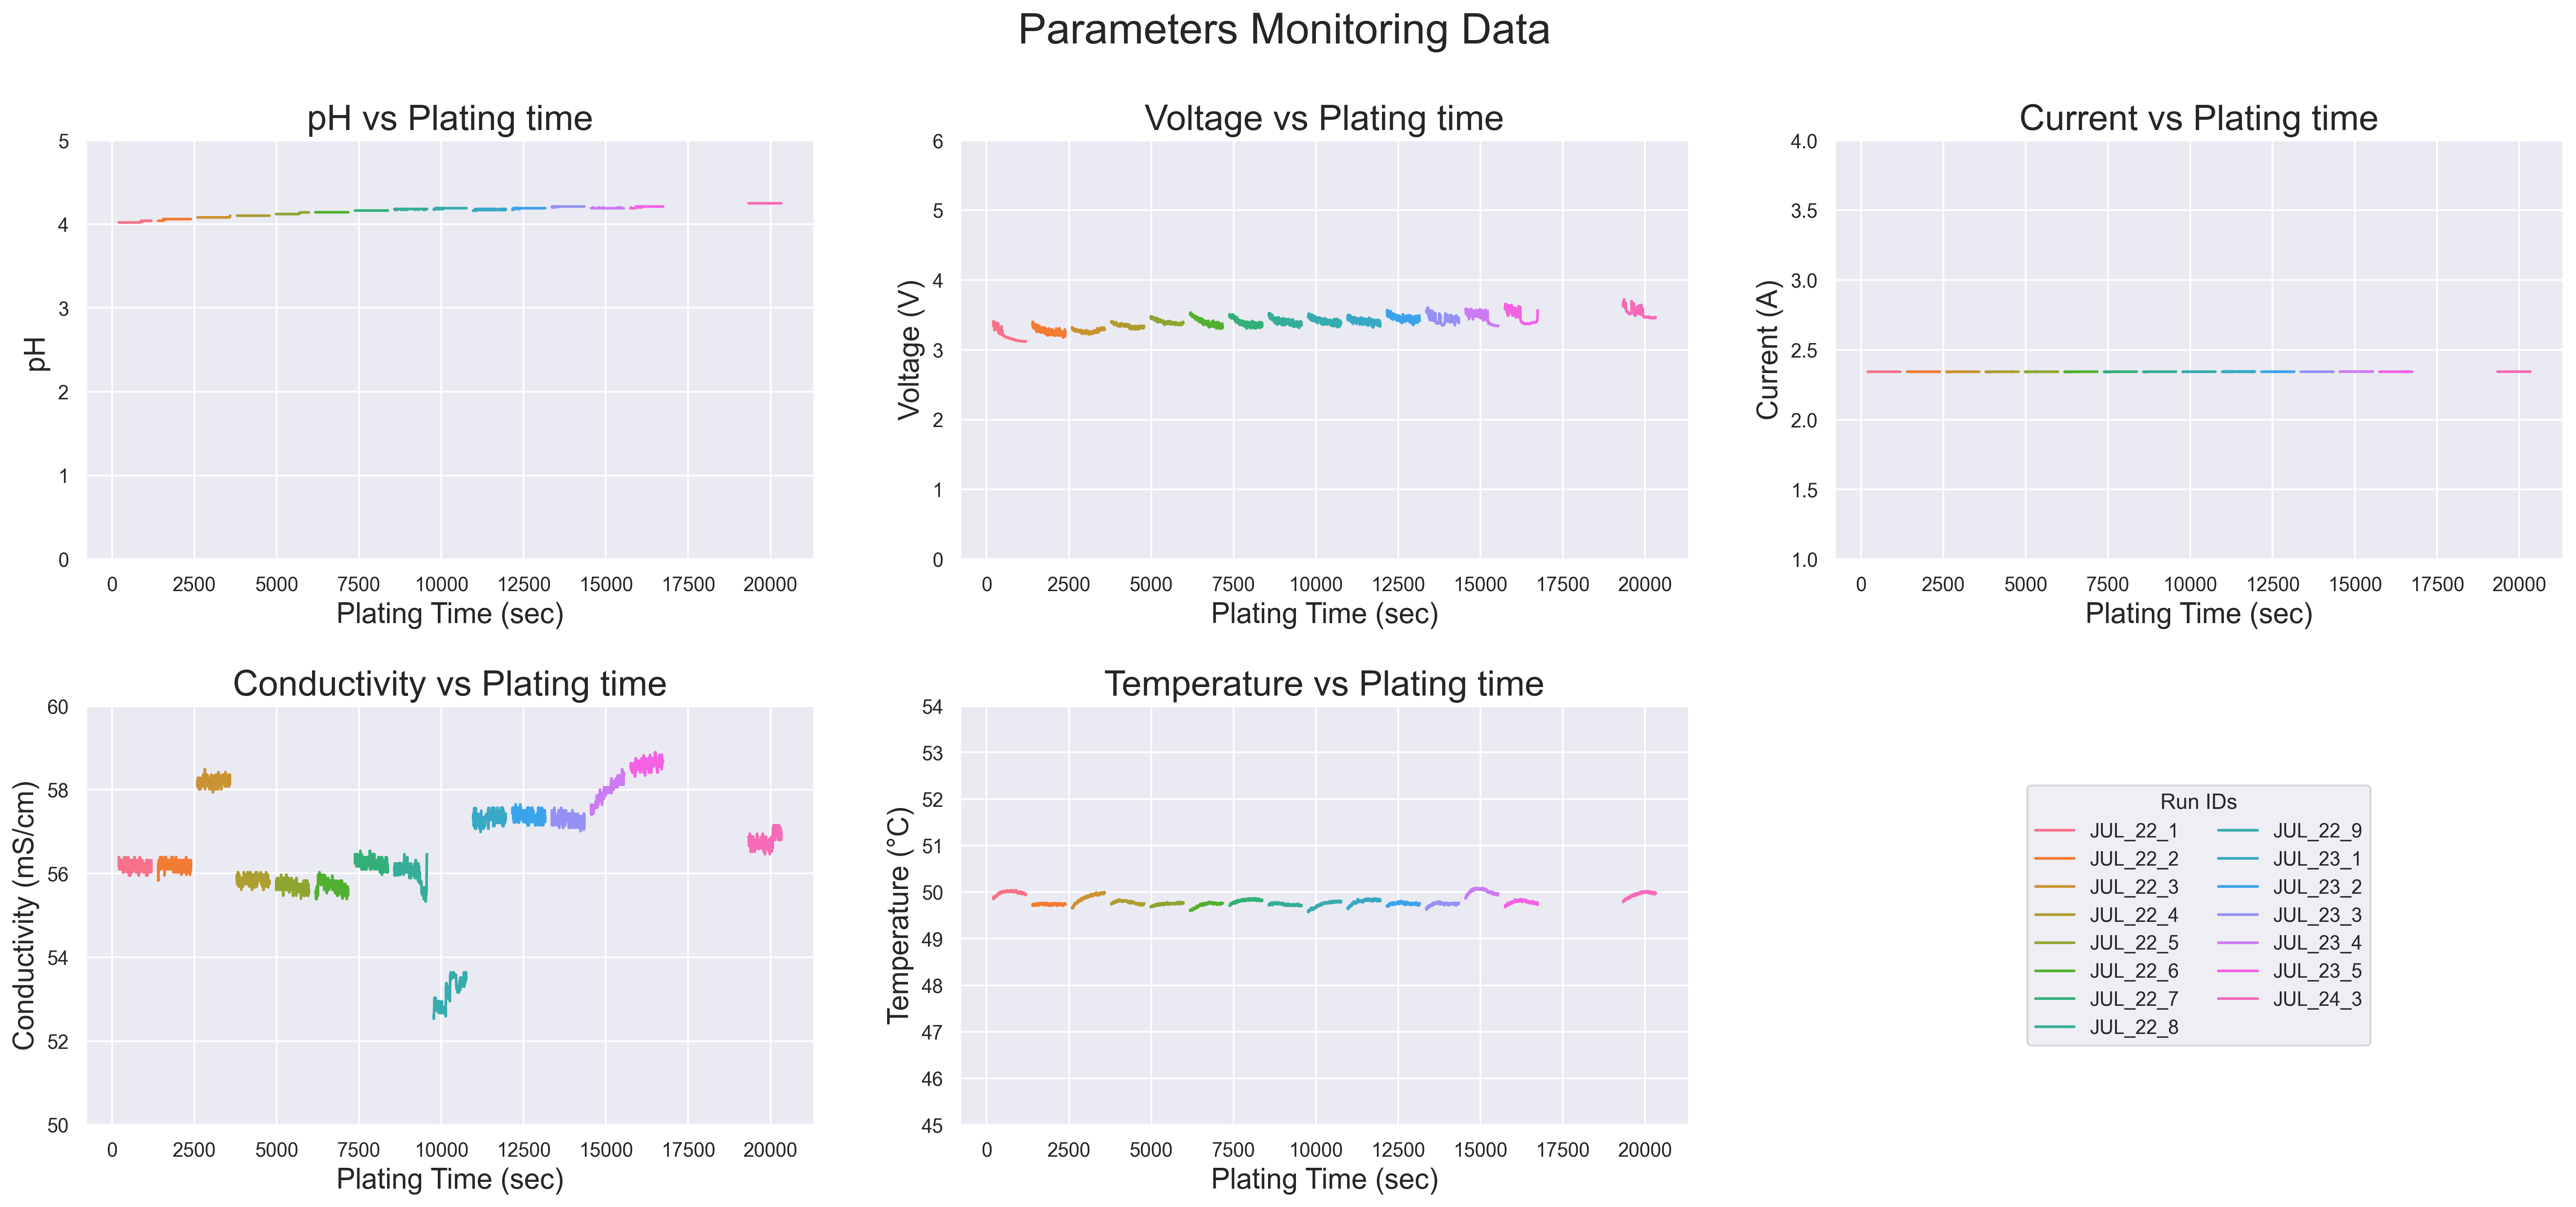

In [19]:
PARAMS = {
	# Default P' TJ
	# 'pH': [2, 5],
	# 'voltage': [0, 5],
	# Need to change due to the platinum anode cause lower pH and higher voltage
	'pH': [0, 5],
	'voltage': [0, 6],
	'current': [1, 4],
	# 'conductivity': [48, 70],
	'conductivity': [50, 60],
	'temperature': [45, 54]
}

plot_all_params(Filter_df, filter_id, PARAMS)

In [20]:
Filter_df.to_excel('Datasets/Filtered_Normal_Data.xlsx', index=False)